In [1]:
### python 3.5 version
### virtualEnv_name is helloTF

import tensorflow as tf
tf.__version__

'1.6.0'

# 설치 및 테스트

In [2]:
# Create a constant op
# This op is added as a node to the default graph
hello = tf.constant("Hello, TensorFlow!")

# seart a TF session
sess = tf.Session()

# run the op and get result
print(sess.run(hello))

b'Hello, TensorFlow!'


In [3]:
## 더하기 예제
# Build graph (tensor) using TensorFlow operations
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
node3 = tf.add(node1, node2)

In [4]:
print("node1: {} node2: {}".format(node1,node2))
print("node3: {}".format(node3))

node1: Tensor("Const_1:0", shape=(), dtype=float32) node2: Tensor("Const_2:0", shape=(), dtype=float32)
node3: Tensor("Add:0", shape=(), dtype=float32)


In [5]:
# feed data and run graph (operation) sess.run(op)
sess = tf.Session() 
print("sess.run(node1, node2): ".format(sess.run([node1, node2])))
print("sess.run(node3): ", sess.run(node3))

sess.run(node1, node2): 
sess.run(node3):  7.0


In [6]:
# placeholder(상수가 아닌 변수를 만들어줌)
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b # + provides a shortcut for tf.add(a,b)

print(sess.run(adder_node, feed_dict={a: 3, b:4.5}))
print(sess.run(adder_node, feed_dict={a:[1,3], b:[2,4]}))

7.5
[3. 7.]


# Lab2 Linear Reression

In [7]:
### Lab2
### Linear Regression

## 1. Build graph using TF operations
# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# tf.Variable의 의미는 tesnsorflow가 사용하는 변수라는 의미 or trainable variable
w = tf.Variable(tf.random_normal([1]), name='weight') # 1차원 array에 대한 랜덤값을 넣어줌
b = tf.Variable(tf.random_normal([1]), name='bias')
# Our hypothesis Xw+b
hypothesis = x_train * w + b

In [8]:
# cost/loss funtion
cost = tf.reduce_mean(tf.square(hypothesis - y_train)) # 평균을 내줌

In [9]:
# Minimize(GradientDescent)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

In [10]:
## 2. Run/update graph and get results
# Launch the graph in a session
sess = tf.Session()
# Initializes global variables in the graph - 사용하기 전에 변수 초기화가 필요함.
sess.run(tf.global_variables_initializer())

# Fit the line
for step in range(2001):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(w), sess.run(b))

0 0.23823766 [0.4044307] [1.1490769]
20 0.18245888 [0.49716726] [1.1235567]
40 0.16540454 [0.5269638] [1.0734658]
60 0.15022035 [0.5497817] [1.0232753]
80 0.13643253 [0.5709961] [0.9752098]
100 0.123910196 [0.5911631] [0.92938083]
120 0.11253718 [0.61037743] [0.88570344]
140 0.10220814 [0.6286883] [0.8440788]
160 0.092827 [0.6461386] [0.8044101]
180 0.08430701 [0.66276884] [0.76660585]
200 0.07656896 [0.6786175] [0.7305781]
220 0.06954115 [0.6937212] [0.69624364]
240 0.06315836 [0.70811516] [0.6635227]
260 0.05736144 [0.7218327] [0.6323396]
280 0.052096557 [0.73490554] [0.6026218]
300 0.04731493 [0.74736404] [0.57430077]
320 0.04297219 [0.75923705] [0.54731077]
340 0.039028045 [0.77055204] [0.5215891]
360 0.035445895 [0.78133523] [0.49707636]
380 0.032192502 [0.7916117] [0.4737156]
400 0.029237749 [0.8014052] [0.45145276]
420 0.026554182 [0.8107384] [0.4302361]
440 0.024116956 [0.819633] [0.41001663]
460 0.021903412 [0.8281095] [0.3907474]
480 0.019893026 [0.83618784] [0.3723837]
500 0

In [11]:
# Now we can use x and y in place of x_data and y_data
# # placeholders for a tensor that will be always fed using feed_dict
# See http://stackoverflow.com/questions/336693740/
w = tf.Variable(tf.random_normal([1]), name='weight') # 1차원 array에 대한 랜덤값을 넣어줌
b = tf.Variable(tf.random_normal([1]), name='bias')
x = tf.placeholder(tf.float32, shape=[None])
y = tf.placeholder(tf.float32, shape=[None])

# Our hypothesis xw+b
hypothesis = x * w + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y)) # 평균을 내줌

# minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# launch the graph in a session
sess = tf.Session()
# initializes global variables in the graph
sess.run(tf.global_variables_initializer())

# fit the line with new training data
for step in range(2001):
    cost_val, w_val, b_val, _ = sess.run([cost, w , b, train],
                                        feed_dict={x: [1,2,3,4,5], y:[2.1,3.1,4.1,5.1,6.1]}) # _ 변수는 필요없다는 의미
    if step % 20 == 0:
        print(step, cost_val, w_val, b_val)
        
# Testing our model
print("테스트 결과는 ",sess.run(hypothesis, feed_dict={x:[5]}))
print("테스트 결과는 ",sess.run(hypothesis, feed_dict={x:[2.5]}))
print("테스트 결과는 ",sess.run(hypothesis, feed_dict={x:[1.5, 3.5]}))

0 10.533874 [0.61488956] [-0.1801044]
20 0.19028953 [1.2789913] [0.08069044]
40 0.16599748 [1.2636056] [0.14824513]
60 0.14496675 [1.2463549] [0.21058007]
80 0.12660055 [1.230221] [0.26882887]
100 0.11056121 [1.2151437] [0.3232629]
120 0.09655395 [1.2010537] [0.3741321]
140 0.08432125 [1.1878866] [0.42166984]
160 0.073638365 [1.1755817] [0.4660942]
180 0.06430894 [1.1640828] [0.5076092]
200 0.056161486 [1.1533369] [0.54640526]
220 0.04904621 [1.1432947] [0.5826606]
240 0.042832486 [1.1339102] [0.6165415]
260 0.03740593 [1.1251404] [0.6482035]
280 0.03266687 [1.1169448] [0.67779195]
300 0.028528232 [1.109286] [0.7054427]
320 0.02491391 [1.1021289] [0.7312825]
340 0.021757493 [1.0954404] [0.7554301]
360 0.019000994 [1.0891899] [0.77799624]
380 0.016593715 [1.0833488] [0.7990845]
400 0.014491427 [1.0778902] [0.8187917]
420 0.012655462 [1.0727892] [0.8372083]
440 0.011052097 [1.068022] [0.8544187]
460 0.009651885 [1.0635673] [0.87050194]
480 0.008429056 [1.0594043] [0.885532]
500 0.0073611

# Lab3 Cost function minimize

In [12]:
### lab3
## 경사하강법이 잘 적용되는지 확인
import matplotlib.pyplot as plt

x=[1,2,3]
y=[1,2,3]

w = tf.placeholder(tf.float32)
# Our hypothesis f or linear model X*W
hypothesis = x*w

In [13]:
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis-y))

In [14]:
# Launch the graph in a session.
sess = tf.Session()
# Initializess global variables in the graph.
sess.run(tf.global_variables_initializer())

In [15]:
# Variables for plotting cost function
w_val = []
cost_val = []
for i in range(-30, 50):
    feed_w = i * 0.1
    curr_cost, curr_w = sess.run([cost, w], feed_dict={w: feed_w})
    w_val.append(curr_w)
    cost_val.append(curr_cost)

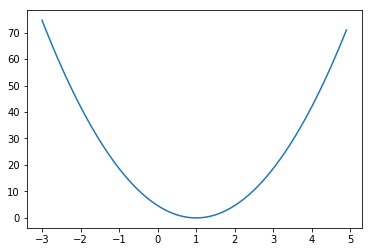

In [16]:
# Show the cost function
plt.plot(w_val, cost_val)
plt.show()

In [17]:
## 최소화 모델
x_data = [1,2,3]
y_data = [1,2,3]

w = tf.Variable(tf.random_normal([1]), name='weight')
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

In [18]:
# Our hypothesis for linear model X*W
hypothesis = x*w
# cost/loss function
cost = tf.reduce_sum(tf.square(hypothesis - y))

In [19]:
# Minimize : Gradient Descent using derivative: W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((w*x - y) * x)
descent = w - learning_rate * gradient
update = w.assign(descent)
## 위의 4단계는 optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)// train=optimizer.minimize(cost) 과 같은 코드이다.

In [20]:
# Launch the graph in a session
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())
for step in range(21):
    sess.run(update, feed_dict={x:x_data, y:y_data})
    print(step, sess.run(cost, feed_dict={x:x_data, y:y_data}), sess.run(w))

0 6.364275 [0.32576632]
1 1.8102828 [0.6404087]
2 0.51492465 [0.808218]
3 0.14646742 [0.8977163]
4 0.041661806 [0.9454487]
5 0.011850495 [0.97090596]
6 0.0033708082 [0.9844832]
7 0.0009588102 [0.9917244]
8 0.00027272763 [0.99558634]
9 7.757704e-05 [0.99764603]
10 2.2065811e-05 [0.99874455]
11 6.2775503e-06 [0.9993304]
12 1.7850723e-06 [0.9996429]
13 5.0765857e-07 [0.99980956]
14 1.4442003e-07 [0.99989843]
15 4.1116937e-08 [0.9999458]
16 1.1709961e-08 [0.9999711]
17 3.3309568e-09 [0.99998456]
18 9.531078e-10 [0.9999918]
19 2.666134e-10 [0.99999565]
20 7.48237e-11 [0.9999977]


In [21]:
## test
x = [1,2,3]
y = [1,2,3]
# set wrong model weights
w = tf.Variable(5.0)
# Linear model
hypothesis = x*w
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y))

In [22]:
# Minimize : Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

In [23]:
# Launch the graph in a session
sess = tf.Session()
#Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

In [24]:
for step in range(100):
    print(step, sess.run(w))
    sess.run(train)

0 5.0
1 1.2666664
2 1.0177778
3 1.0011852
4 1.000079
5 1.0000052
6 1.0000004
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 1.0
49 1.0
50 1.0
51 1.0
52 1.0
53 1.0
54 1.0
55 1.0
56 1.0
57 1.0
58 1.0
59 1.0
60 1.0
61 1.0
62 1.0
63 1.0
64 1.0
65 1.0
66 1.0
67 1.0
68 1.0
69 1.0
70 1.0
71 1.0
72 1.0
73 1.0
74 1.0
75 1.0
76 1.0
77 1.0
78 1.0
79 1.0
80 1.0
81 1.0
82 1.0
83 1.0
84 1.0
85 1.0
86 1.0
87 1.0
88 1.0
89 1.0
90 1.0
91 1.0
92 1.0
93 1.0
94 1.0
95 1.0
96 1.0
97 1.0
98 1.0
99 1.0


In [25]:
### Optional: compute_gradient and apply_gradient
x = [1,2,3]
y = [1,2,3]
# set wrong model weights
w = tf.Variable(5.)
# Linear model
hypothesis = x*w
# Manual gradient
gradient = tf.reduce_mean((w*x-y)*x)*2
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis-y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

# Get gradients
gvs = optimizer.compute_gradients(cost,[w])
# Apply gradients
apply_gradients = optimizer.apply_gradients(gvs)

# Launch the graph in a session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
    print(step, sess.run([gradient, w, gvs]))
    sess.run(apply_gradients)

0 [37.333332, 5.0, [(37.333336, 5.0)]]
1 [33.84889, 4.6266665, [(33.84889, 4.6266665)]]
2 [30.689657, 4.2881775, [(30.689657, 4.2881775)]]
3 [27.825287, 3.9812808, [(27.825287, 3.9812808)]]
4 [25.228262, 3.703028, [(25.228264, 3.703028)]]
5 [22.873621, 3.4507453, [(22.873623, 3.4507453)]]
6 [20.738752, 3.2220092, [(20.738752, 3.2220092)]]
7 [18.803137, 3.0146217, [(18.803137, 3.0146217)]]
8 [17.048176, 2.8265903, [(17.048176, 2.8265903)]]
9 [15.457013, 2.6561086, [(15.457014, 2.6561086)]]
10 [14.014359, 2.5015385, [(14.01436, 2.5015385)]]
11 [12.706352, 2.361395, [(12.706352, 2.361395)]]
12 [11.520427, 2.2343314, [(11.520427, 2.2343314)]]
13 [10.445186, 2.119127, [(10.445186, 2.119127)]]
14 [9.470302, 2.0146751, [(9.470302, 2.0146751)]]
15 [8.586407, 1.9199722, [(8.586407, 1.9199722)]]
16 [7.785009, 1.8341081, [(7.785009, 1.8341081)]]
17 [7.0584083, 1.756258, [(7.0584083, 1.756258)]]
18 [6.399624, 1.685674, [(6.399624, 1.685674)]]
19 [5.8023257, 1.6216778, [(5.8023257, 1.6216778)]]
20 

# Lab4 Multi-variable linear regression

In [26]:
x1_data = [74., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

# placeholders for a tensor that will be always fed.
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)

y = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name='weight1')
w2 = tf.Variable(tf.random_normal([1]), name='weight2')
w3 = tf.Variable(tf.random_normal([1]), name='weight3')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b

In [27]:
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y))
# Minimize. Need a very small learning rate for this data set
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

In [28]:
# Launch the graph in a session.
# 매트릭스 사용 전
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())
for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                  feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, y: y_data})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n",hy_val)

0 Cost:  32323.387 
Prediction:
 [-6.2685294 -8.303241  -7.8855405 -9.011113  -5.8896384]
10 Cost:  2.3662658 
Prediction:
 [153.35138 182.7286  180.33252 195.95294 139.82443]
20 Cost:  2.0666544 
Prediction:
 [153.82431 183.30391 180.89412 196.5652  140.2652 ]
30 Cost:  2.0566275 
Prediction:
 [153.8209  183.30916 180.89404 196.56581 140.27112]
40 Cost:  2.04664 
Prediction:
 [153.8161  183.3127  180.89229 196.56458 140.27574]
50 Cost:  2.0367408 
Prediction:
 [153.81131 183.31621 180.89056 196.56339 140.28035]
60 Cost:  2.026858 
Prediction:
 [153.80652 183.31972 180.88881 196.56216 140.28494]
70 Cost:  2.0170324 
Prediction:
 [153.80174 183.32323 180.88708 196.56094 140.28952]
80 Cost:  2.007246 
Prediction:
 [153.79697 183.3267  180.88535 196.55977 140.29411]
90 Cost:  1.9975315 
Prediction:
 [153.79222 183.33018 180.88362 196.55855 140.29866]
100 Cost:  1.9878349 
Prediction:
 [153.78748 183.33368 180.88193 196.55734 140.30322]
110 Cost:  1.9782165 
Prediction:
 [153.78275 183.337

1070 Cost:  1.243218 
Prediction:
 [153.37878 183.63315 180.73361 196.45401 140.69522]
1080 Cost:  1.2372448 
Prediction:
 [153.37506 183.63588 180.73225 196.45306 140.69879]
1090 Cost:  1.231302 
Prediction:
 [153.37135 183.63861 180.73091 196.45213 140.70236]
1100 Cost:  1.22539 
Prediction:
 [153.36763 183.64131 180.72957 196.4512  140.70592]
1110 Cost:  1.2195079 
Prediction:
 [153.36395 183.64404 180.72824 196.45029 140.70947]
1120 Cost:  1.2136503 
Prediction:
 [153.36026 183.64674 180.72688 196.44934 140.713  ]
1130 Cost:  1.2078278 
Prediction:
 [153.35657 183.64941 180.72554 196.4484  140.71652]
1140 Cost:  1.2020136 
Prediction:
 [153.3529  183.65213 180.72421 196.44748 140.72006]
1150 Cost:  1.1962591 
Prediction:
 [153.34924 183.6548  180.72289 196.44655 140.72356]
1160 Cost:  1.1905136 
Prediction:
 [153.34558 183.65747 180.72156 196.44563 140.72707]
1170 Cost:  1.1848035 
Prediction:
 [153.34193 183.66014 180.72023 196.4447  140.73055]
1180 Cost:  1.1791228 
Prediction:
 

In [29]:
# 매트릭스 사용(리스트 사용)
x_data = [[73., 80., 75.], [93., 88., 93.], [89., 91., 90.], [96., 98., 100.], [73., 66., 70.]]
y_data = [[152.], [185.], [180.], [196.], [142.]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train = optimizer.minimize(cost)

In [30]:
# Launch the graph in a session
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                  feed_dict={X: x_data, Y: y_data})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  3263.4297 
Prediction:
 [[194.00865]
 [250.43727]
 [237.38333]
 [263.08206]
 [191.77484]]
10 Cost:  23.196613 
Prediction:
 [[143.67157]
 [189.9031 ]
 [177.7551 ]
 [198.14548]
 [145.59683]]
20 Cost:  23.062708 
Prediction:
 [[143.53658]
 [189.7082 ]
 [177.58011]
 [197.95197]
 [145.44249]]
30 Cost:  22.959017 
Prediction:
 [[143.5534 ]
 [189.69586]
 [177.58498]
 [197.95433]
 [145.42743]]
40 Cost:  22.855911 
Prediction:
 [[143.57065]
 [189.68413]
 [177.59038]
 [197.95726]
 [145.41283]]
50 Cost:  22.753323 
Prediction:
 [[143.58789]
 [189.67245]
 [177.59581]
 [197.96024]
 [145.39832]]
60 Cost:  22.651142 
Prediction:
 [[143.60509]
 [189.66077]
 [177.6012 ]
 [197.96317]
 [145.3838 ]]
70 Cost:  22.549707 
Prediction:
 [[143.62218]
 [189.64911]
 [177.60655]
 [197.96608]
 [145.36932]]
80 Cost:  22.448717 
Prediction:
 [[143.63928]
 [189.63751]
 [177.61192]
 [197.96902]
 [145.35492]]
90 Cost:  22.348242 
Prediction:
 [[143.65631]
 [189.62592]
 [177.61725]
 [197.97191]
 [145.34052]]
1

820 Cost:  16.286562 
Prediction:
 [[144.7857 ]
 [188.8587 ]
 [177.97227]
 [198.15912]
 [144.39243]]
830 Cost:  16.218733 
Prediction:
 [[144.79971]
 [188.8492 ]
 [177.9767 ]
 [198.16136]
 [144.38075]]
840 Cost:  16.151224 
Prediction:
 [[144.81372]
 [188.83974]
 [177.98112]
 [198.16364]
 [144.36913]]
850 Cost:  16.084103 
Prediction:
 [[144.82764]
 [188.83026]
 [177.98549]
 [198.16583]
 [144.35748]]
860 Cost:  16.017319 
Prediction:
 [[144.84154]
 [188.82082]
 [177.98987]
 [198.16806]
 [144.3459 ]]
870 Cost:  15.95083 
Prediction:
 [[144.85542]
 [188.8114 ]
 [177.99425]
 [198.17029]
 [144.33435]]
880 Cost:  15.884845 
Prediction:
 [[144.86923]
 [188.80203]
 [177.99861]
 [198.1725 ]
 [144.32285]]
890 Cost:  15.819054 
Prediction:
 [[144.88303]
 [188.79265]
 [178.00294]
 [198.17468]
 [144.31134]]
900 Cost:  15.753749 
Prediction:
 [[144.89677]
 [188.78334]
 [178.00728]
 [198.17688]
 [144.2999 ]]
910 Cost:  15.688667 
Prediction:
 [[144.9105 ]
 [188.77402]
 [178.01161]
 [198.17908]
 [144

1730 Cost:  11.367506 
Prediction:
 [[145.92122]
 [188.08887]
 [178.33116]
 [198.33362]
 [143.45398]]
1740 Cost:  11.325443 
Prediction:
 [[145.93227]
 [188.08142]
 [178.33469]
 [198.33525]
 [143.44499]]
1750 Cost:  11.28358 
Prediction:
 [[145.94325]
 [188.07394]
 [178.33815]
 [198.33684]
 [143.43597]]
1760 Cost:  11.241826 
Prediction:
 [[145.95427]
 [188.06651]
 [178.34166]
 [198.33844]
 [143.42702]]
1770 Cost:  11.200447 
Prediction:
 [[145.96521]
 [188.05913]
 [178.34512]
 [198.34003]
 [143.41808]]
1780 Cost:  11.159202 
Prediction:
 [[145.9761 ]
 [188.0517 ]
 [178.34857]
 [198.34158]
 [143.40912]]
1790 Cost:  11.118231 
Prediction:
 [[145.987  ]
 [188.04434]
 [178.35205]
 [198.34319]
 [143.40025]]
1800 Cost:  11.077402 
Prediction:
 [[145.99786]
 [188.03697]
 [178.35547]
 [198.34474]
 [143.39136]]
1810 Cost:  11.03684 
Prediction:
 [[146.0087 ]
 [188.02965]
 [178.35893]
 [198.34633]
 [143.38252]]
1820 Cost:  10.996464 
Prediction:
 [[146.01952]
 [188.02235]
 [178.36238]
 [198.347

In [33]:
## 파일 불러와서 작업하기 연습
import numpy as np
xy = np.loadtxt('data/data-01-test-score.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1] # 0:-1은 마지막 열을 제외하고 모두 가져온다는 뜻
y_data = xy[:, [-1]]

# Make sure the shape and data are OK
print(x_data.shape, x_data, len(x_data))
print(y_data.shape, y_data)

# placeholders for a tensor that wil be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

(25, 3) [[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]] 25
(25, 1) [[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


In [34]:
# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

In [35]:
# Launch the graph in a session
sess = tf.Session()
# Initializes global variables in the graph
sess.run(tf.global_variables_initializer())
# Set up feed_dict variables inside the loop.
for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                  feed_dict={X: x_data, Y: y_data})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  14526.735 
Prediction:
 [[44.262955]
 [47.85704 ]
 [50.100304]
 [52.662018]
 [36.658318]
 [23.308449]
 [37.96737 ]
 [26.312262]
 [41.079865]
 [33.260563]
 [36.937275]
 [33.28233 ]
 [53.659004]
 [46.94495 ]
 [37.119987]
 [47.22584 ]
 [45.35844 ]
 [45.674294]
 [52.28078 ]
 [46.97428 ]
 [44.49871 ]
 [43.33102 ]
 [43.419357]
 [49.04272 ]
 [51.374393]]
10 Cost:  43.727036 
Prediction:
 [[156.61426 ]
 [182.92674 ]
 [183.16815 ]
 [197.5964  ]
 [139.66827 ]
 [ 99.278145]
 [146.46631 ]
 [106.76042 ]
 [167.33632 ]
 [150.23744 ]
 [141.46669 ]
 [136.37059 ]
 [191.12337 ]
 [161.20116 ]
 [146.12419 ]
 [184.29945 ]
 [154.16667 ]
 [175.88428 ]
 [183.32603 ]
 [164.22734 ]
 [171.73102 ]
 [170.05544 ]
 [164.71864 ]
 [162.28896 ]
 [191.34688 ]]
20 Cost:  42.718685 
Prediction:
 [[157.36823 ]
 [183.86633 ]
 [184.07564 ]
 [198.59822 ]
 [140.38208 ]
 [ 99.829094]
 [147.22687 ]
 [107.33817 ]
 [168.23866 ]
 [151.106   ]
 [142.19556 ]
 [137.10919 ]
 [192.0477  ]
 [161.95253 ]
 [146.89473 ]
 [185.26271 

390 Cost:  32.73412 
Prediction:
 [[156.6147 ]
 [184.08846]
 [183.67554]
 [198.62274]
 [140.45203]
 [100.72266]
 [147.61331]
 [108.10588]
 [169.27026]
 [153.17978]
 [142.43135]
 [138.01584]
 [191.18272]
 [160.65091]
 [147.50233]
 [185.82263]
 [153.42764]
 [177.29092]
 [183.12846]
 [164.01091]
 [173.07413]
 [171.53351]
 [165.76572]
 [161.20317]
 [192.14531]]
400 Cost:  32.506413 
Prediction:
 [[156.59596]
 [184.09366]
 [183.66547]
 [198.62321]
 [140.45341]
 [100.74461]
 [147.62291]
 [108.12515]
 [169.29555]
 [153.231  ]
 [142.4371 ]
 [138.03812]
 [191.16104]
 [160.61835]
 [147.5174 ]
 [185.83629]
 [153.39133]
 [177.30328]
 [183.1017 ]
 [163.98604]
 [173.08531]
 [171.5478 ]
 [165.77074]
 [161.15799]
 [192.14095]]
410 Cost:  32.280693 
Prediction:
 [[156.57733 ]
 [184.09885 ]
 [183.65543 ]
 [198.62367 ]
 [140.45482 ]
 [100.766464]
 [147.6325  ]
 [108.14433 ]
 [169.32074 ]
 [153.28203 ]
 [142.44284 ]
 [138.06032 ]
 [191.13947 ]
 [160.58595 ]
 [147.53241 ]
 [185.84988 ]
 [153.35516 ]
 [177.

 [191.99301 ]]
770 Cost:  25.333437 
Prediction:
 [[155.9625  ]
 [184.26674 ]
 [183.32233 ]
 [198.64091 ]
 [140.49469 ]
 [101.488205]
 [147.9561  ]
 [108.79178 ]
 [170.15234 ]
 [154.9734  ]
 [142.63466 ]
 [138.79536 ]
 [190.42201 ]
 [159.50688 ]
 [148.03502 ]
 [186.2987  ]
 [152.14742 ]
 [177.73386 ]
 [182.191   ]
 [163.1411  ]
 [173.47089 ]
 [172.03253 ]
 [165.94754 ]
 [159.62094 ]
 [191.98912 ]]
780 Cost:  25.169733 
Prediction:
 [[155.94687]
 [184.27092]
 [183.31381]
 [198.6414 ]
 [140.49553]
 [101.50655]
 [147.96452]
 [108.80861]
 [170.17348]
 [155.01657]
 [142.6396 ]
 [138.81409]
 [190.40364]
 [159.4792 ]
 [148.04799]
 [186.31013]
 [152.11632]
 [177.7448 ]
 [182.1684 ]
 [163.12016]
 [173.48058]
 [172.0445 ]
 [165.95206]
 [159.5828 ]
 [191.98524]]
790 Cost:  25.007483 
Prediction:
 [[155.93134 ]
 [184.27505 ]
 [183.30533 ]
 [198.64188 ]
 [140.49637 ]
 [101.524796]
 [147.9729  ]
 [108.82536 ]
 [170.19449 ]
 [155.05956 ]
 [142.64452 ]
 [138.83273 ]
 [190.38535 ]
 [159.45164 ]
 [148.0

1190 Cost:  19.545893 
Prediction:
 [[155.36699]
 [184.42204]
 [182.99567]
 [198.6609 ]
 [140.51955]
 [102.18807]
 [148.28548]
 [109.44976]
 [170.95863]
 [156.62872]
 [142.82573]
 [139.51218]
 [189.71492]
 [158.44005]
 [148.5376 ]
 [186.73402]
 [150.94534]
 [178.16469]
 [181.32298]
 [162.33836]
 [173.84848]
 [172.48933]
 [166.12654]
 [158.15721]
 [191.83623]]
1200 Cost:  19.432133 
Prediction:
 [[155.35423]
 [184.4253 ]
 [182.98862]
 [198.66138]
 [140.51991]
 [102.20309]
 [148.29276]
 [109.46426]
 [170.97592]
 [156.66443]
 [142.8299 ]
 [139.52762]
 [189.69962]
 [158.4169 ]
 [148.54858]
 [186.74338]
 [150.91916]
 [178.17426]
 [181.30423]
 [162.32106]
 [173.85675]
 [172.49916]
 [166.13055]
 [158.1256 ]
 [191.83282]]
1210 Cost:  19.319317 
Prediction:
 [[155.34152]
 [184.42848]
 [182.98158]
 [198.66187]
 [140.52025]
 [102.21803]
 [148.29999]
 [109.47872]
 [170.99313]
 [156.69997]
 [142.83403]
 [139.54297]
 [189.68434]
 [158.39384]
 [148.55951]
 [186.75266]
 [150.89307]
 [178.18379]
 [181.

1610 Cost:  15.519483 
Prediction:
 [[154.88057]
 [184.54172]
 [182.72485]
 [198.68048]
 [140.52632]
 [102.7606 ]
 [148.5702 ]
 [110.01762]
 [171.61812]
 [157.99773]
 [142.98697]
 [140.10254]
 [189.12532]
 [157.54726]
 [148.96365]
 [187.09023]
 [149.93166]
 [178.54192]
 [180.60239]
 [161.67448]
 [174.17159]
 [172.8636 ]
 [166.28522]
 [156.9433 ]
 [191.70143]]
1620 Cost:  15.440234 
Prediction:
 [[154.87016]
 [184.5442 ]
 [182.71901]
 [198.68095]
 [140.52629]
 [102.77287]
 [148.5765 ]
 [110.03015]
 [171.63225]
 [158.02727]
 [142.9905 ]
 [140.11525]
 [189.11253]
 [157.52788]
 [148.97296]
 [187.09785]
 [149.90955]
 [178.55031]
 [180.5868 ]
 [161.66016]
 [174.1787 ]
 [172.87166]
 [166.28877]
 [156.91707]
 [191.69841]]
1630 Cost:  15.36169 
Prediction:
 [[154.85979]
 [184.54666]
 [182.71318]
 [198.6814 ]
 [140.52628]
 [102.78508]
 [148.58278]
 [110.04264]
 [171.64632]
 [158.05666]
 [142.994  ]
 [140.12788]
 [189.09981]
 [157.50858]
 [148.98225]
 [187.10545]
 [149.88753]
 [178.55867]
 [180.5

In [36]:
# Ask mys score
print("Your score will be ", sess.run(hypothesis, feed_dict={X: [[100, 70, 101]]}))
print("Other score will be ", sess.run(hypothesis, feed_dict={X: [[60, 70, 110], [90, 100, 80]]}))

Your score will be  [[180.38405]]
Other score will be  [[161.94759]
 [183.43306]]


# Lab5 Logistic Classification

In [37]:
## logistic regression
x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]

# placeholders for a tensor that will be always fed
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([2,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W) + b))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [38]:
# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [39]:
## Train the model
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)
    
    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                      feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

0 0.8519616
200 0.48953295
400 0.44287467
600 0.4153812
800 0.39590743
1000 0.38029718
1200 0.3668129
1400 0.35465744
1600 0.34343556
1800 0.33293638
2000 0.3230388
2200 0.31366718
2400 0.30477002
2600 0.29630888
2800 0.28825298
3000 0.28057614
3200 0.27325526
3400 0.2662691
3600 0.25959826
3800 0.2532247
4000 0.24713157
4200 0.24130291
4400 0.23572397
4600 0.23038079
4800 0.2252603
5000 0.22035027
5200 0.21563916
5400 0.2111162
5600 0.20677124
5800 0.20259488
6000 0.19857813
6200 0.19471276
6400 0.19099082
6600 0.187405
6800 0.18394846
7000 0.18061467
7200 0.17739761
7400 0.17429148
7600 0.17129095
7800 0.16839097
8000 0.16558674
8200 0.16287385
8400 0.16024807
8600 0.15770547
8800 0.1552421
9000 0.15285462
9200 0.15053959
9400 0.14829396
9600 0.14611453
9800 0.14399865
10000 0.14194374

Hypothesis:  [[0.02762869]
 [0.15440346]
 [0.28961366]
 [0.78844   ]
 [0.94393563]
 [0.9816421 ]] 
Correct (Y):  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  1.0


# Lab6 Softmax

In [40]:
### Lab 6-1 : Softmax Classifier
x_data = [[1, 2,1,1], [2,1,3,2], [3,1,3,4], [4,1,5,5], [1,7,5,5], [1,2,5,6], [1,6,6,6], [1,7,7,7]]
y_data = [[0,0,1], [0,0,1], [0,0,1], [0,1,0], [0,1,0], [0,1,0], [1,0,0], [1,0,0]]

X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3]) # 보통 y의 갯수가 lable의 갯수가 됨.
nb_classes = 3

W = tf.Variable(tf.random_normal([4, nb_classes]), name='weight') # x의 값이 4개, y의 값이 3개 
b = tf.Variable(tf.random_normal([nb_classes]), name='bias') # b는 출력값과 같음

In [41]:
# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

In [42]:
# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [43]:
# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
        sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}))
            
    # Testing & One-hot encoding
    a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9]]})
    print(a, sess.run(tf.argmax(a, 1))) # arg_max함수를 통해 one-hot encoding을 해줌.
    
    all = sess.run(hypothesis, feed_dict={X: [[1,11,7,9],[1,3,4,3],[1,1,0,1]]})
    print(all, sess.run(tf.argmax(all, 1)))

0 4.1251154
200 0.504115
400 0.40468982
600 0.32357815
800 0.25845942
1000 0.23137864
1200 0.20967683
1400 0.19168878
1600 0.17650157
1800 0.16349748
2000 0.15223582
[[7.0306715e-03 9.9296266e-01 6.6731104e-06]] [1]
[[7.0306710e-03 9.9296266e-01 6.6731104e-06]
 [8.3147657e-01 1.5956099e-01 8.9625400e-03]
 [6.9922121e-09 2.9718253e-04 9.9970275e-01]] [1 0 2]


In [44]:
# ### Lab 6-2 : Fancy SoftmaxClassifier
# ### cross_entropy, one_hot, reshape

# ## softmax_corss_entropy_with_logits

# logits = tf.matmul(X, W) + b
# hypothesis = tf.nn.softmax(logits)

# # Cross entropy cost/loss
# cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1)) # Y는 one-hot으로 주어짐

# # Cross entropy cost/loss
# cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y_one_hot)
# cost = tf.reduce_mean(cost_i)

In [45]:
## Animal classification with softmax_cross_entropy_with_logits
# Predictin animal type based on various features
xy = np.loadtxt('data/data-04-zoo.csv', delimiter=",", dtype=np.float32)
x_data = xy[:,0:-1]
y_data = xy[:,[-1]]

nb_classes = 7 # 0 ~ 6

In [46]:
X = tf.placeholder(tf.float32, [None, 16])
Y = tf.placeholder(tf.int32, [None, 1]) # 0 ~ 6

Y_one_hot = tf.one_hot(Y, nb_classes) # one hot
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])

W = tf.Variable(tf.random_normal([16, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

In [47]:
# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

In [48]:
# Cross entropy cost/loss
cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y_one_hot)

cost = tf.reduce_mean(cost_i)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [49]:
# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2000):
        sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={
                X: x_data, Y: y_data})
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))
            
    # Let's see if we can predict
    pred = sess.run(prediction, feed_dict={X: x_data})
    # y_data: (N,1) = flatten => (N, ) matches pred.shape
    for p, y in zip(pred, y_data.flatten()):
        print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))

Step:     0	Loss: 3.597	Acc: 40.59%
Step:   100	Loss: 0.631	Acc: 82.18%
Step:   200	Loss: 0.361	Acc: 88.12%
Step:   300	Loss: 0.259	Acc: 97.03%
Step:   400	Loss: 0.205	Acc: 98.02%
Step:   500	Loss: 0.171	Acc: 98.02%
Step:   600	Loss: 0.146	Acc: 99.01%
Step:   700	Loss: 0.128	Acc: 99.01%
Step:   800	Loss: 0.114	Acc: 99.01%
Step:   900	Loss: 0.102	Acc: 99.01%
Step:  1000	Loss: 0.093	Acc: 99.01%
Step:  1100	Loss: 0.085	Acc: 99.01%
Step:  1200	Loss: 0.078	Acc: 99.01%
Step:  1300	Loss: 0.072	Acc: 99.01%
Step:  1400	Loss: 0.067	Acc: 99.01%
Step:  1500	Loss: 0.063	Acc: 99.01%
Step:  1600	Loss: 0.059	Acc: 100.00%
Step:  1700	Loss: 0.056	Acc: 100.00%
Step:  1800	Loss: 0.053	Acc: 100.00%
Step:  1900	Loss: 0.050	Acc: 100.00%
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y:

# Lab7-1 training/test dataset, learning rate, normalization

In [51]:
x_data = [[1,2,1], [1,3,2], [1,3,4], [1,5,5], [1,7,5], [1,2,5], [1,6,6], [1,7,7]]
y_data = [[0,0,1], [0,0,1], [0,0,1], [0,1,0], [0,1,0], [0,1,0], [1,0,0], [1,0,0]]

# Evaluation our model using this test dataset
x_test = [[2,1,1], [3,1,2], [3,3,4]]
y_test = [[0,0,1], [0,0,1], [0,0,1]]

In [52]:
X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])
W = tf.Variable(tf.random_normal([3,3]))
b = tf.Variable(tf.random_normal([3]))

In [53]:
# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W)+b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

#Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [61]:
# Correct prediction Test model
prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [63]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer],
                                     feed_dict={X: x_data, Y: y_data})
        print(step, cost_val, W_val)
        
    # predict
    print("Prediction:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy:", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))

0 4.360067 [[ 1.8339418  -1.0977979   0.99941754]
 [ 0.55813456  1.0309986   0.91029286]
 [ 0.87062454  0.27931258  0.47490376]]
1 2.144021 [[ 1.7903707  -1.0621537   1.0073445 ]
 [ 0.42566234  1.1978885   0.8758751 ]
 [ 0.7238369   0.45989877  0.44110522]]
2 1.3620043 [[ 1.7761302  -1.0441607   1.003592  ]
 [ 0.44686025  1.2620925   0.7904733 ]
 [ 0.72562903  0.5462207   0.35299107]]
3 1.2737262 [[ 1.7595886  -1.0450714   1.0210443 ]
 [ 0.46611178  1.21592     0.81739426]
 [ 0.72309804  0.5298863   0.37185645]]
4 1.2441745 [[ 1.7409344  -1.0385307   1.0331577 ]
 [ 0.46984962  1.2124835   0.81709284]
 [ 0.70641285  0.5533459   0.36508203]]
5 1.2277836 [[ 1.7253036  -1.0349172   1.0451751 ]
 [ 0.48805872  1.1929182   0.81844914]
 [ 0.70452917  0.5609348   0.35937685]]
6 1.2125725 [[ 1.7084916  -1.0298232   1.0568931 ]
 [ 0.4990286   1.1821821   0.8182154 ]
 [ 0.6959217   0.57648903  0.35243008]]
7 1.1979699 [[ 1.6925173  -1.0255562   1.0686004 ]
 [ 0.51326674  1.1672553   0.81890404]
 [

 [ 0.75277334  0.9124247  -0.04035674]]
149 0.66542554 [[ 0.41430122 -0.7149231   2.0361836 ]
 [ 0.9713772   0.77125007  0.7567992 ]
 [ 0.75455177  0.91188616 -0.04159663]]
150 0.66433924 [[ 0.40871873 -0.7136207   2.0404637 ]
 [ 0.97179013  0.771507    0.7561293 ]
 [ 0.75632805  0.91134614 -0.04283292]]
151 0.66326094 [[ 0.40315706 -0.7123218   2.0447264 ]
 [ 0.9721966   0.7717658   0.75546414]
 [ 0.7581022   0.91080475 -0.04406566]]
152 0.662191 [[ 0.39761597 -0.7110263   2.048972  ]
 [ 0.97259647  0.7720265   0.7548036 ]
 [ 0.75987405  0.9102622  -0.04529499]]
153 0.66112864 [[ 0.39209524 -0.7097342   2.0532005 ]
 [ 0.9729902   0.7722887   0.75414765]
 [ 0.76164377  0.9097185  -0.04652099]]
154 0.6600743 [[ 0.38659462 -0.70844537  2.0574121 ]
 [ 0.9733776   0.7725526   0.75349635]
 [ 0.7634111   0.90917397 -0.04774374]]
155 0.6590272 [[ 0.38111398 -0.7071599   2.0616074 ]
 [ 0.9737592   0.7728177   0.7528497 ]
 [ 0.76517636  0.9086283  -0.04896331]]
156 0.6579879 [[ 0.37565294 -0.70

In [78]:
# Non-normalized inputs
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

from sklearn.preprocessing import MinMaxScaler
xy = MinMaxScaler().fit_transform(xy)

x_data = xy[:,0:-1]
y_data = xy[:,[-1]]

In [79]:
# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [80]:
hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [81]:
# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

In [82]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  4.499031 
Prediction:
 [[2.9810686]
 [3.8709822]
 [3.0124154]
 [2.0626142]
 [2.5547428]
 [2.456768 ]
 [1.720749 ]
 [1.9880545]]
1 Cost:  4.498698 
Prediction:
 [[2.9809654]
 [3.8708787]
 [3.0123296]
 [2.0625474]
 [2.5546641]
 [2.4566917]
 [1.7206966]
 [1.9880018]]
2 Cost:  4.4983654 
Prediction:
 [[2.9808621]
 [3.8707752]
 [3.0122433]
 [2.062481 ]
 [2.5545855]
 [2.4566157]
 [1.7206442]
 [1.9879494]]
3 Cost:  4.4980326 
Prediction:
 [[2.9807587]
 [3.8706717]
 [3.0121572]
 [2.0624142]
 [2.5545068]
 [2.4565396]
 [1.7205918]
 [1.9878967]]
4 Cost:  4.4976997 
Prediction:
 [[2.9806552]
 [3.8705683]
 [3.0120711]
 [2.0623477]
 [2.554428 ]
 [2.4564633]
 [1.7205393]
 [1.9878442]]
5 Cost:  4.4973664 
Prediction:
 [[2.9805517]
 [3.8704648]
 [3.0119848]
 [2.0622811]
 [2.5543494]
 [2.456387 ]
 [1.7204869]
 [1.9877917]]
6 Cost:  4.497034 
Prediction:
 [[2.9804482]
 [3.8703618]
 [3.011899 ]
 [2.0622144]
 [2.5542707]
 [2.4563107]
 [1.7204344]
 [1.9877391]]
7 Cost:  4.4967012 
Prediction:
 [[2.

231 Cost:  4.422777 
Prediction:
 [[2.957284 ]
 [3.8471808]
 [2.9925976]
 [2.047285 ]
 [2.5366416]
 [2.439239 ]
 [1.7086836]
 [1.975954 ]]
232 Cost:  4.42245 
Prediction:
 [[2.9571815]
 [3.8470786]
 [2.9925122]
 [2.047219 ]
 [2.5365639]
 [2.4391632]
 [1.7086316]
 [1.975902 ]]
233 Cost:  4.422123 
Prediction:
 [[2.957079 ]
 [3.8469758]
 [2.9924269]
 [2.047153 ]
 [2.5364857]
 [2.4390879]
 [1.7085798]
 [1.9758499]]
234 Cost:  4.421796 
Prediction:
 [[2.9569764]
 [3.8468735]
 [2.9923415]
 [2.0470872]
 [2.536408 ]
 [2.4390123]
 [1.7085278]
 [1.9757977]]
235 Cost:  4.4214687 
Prediction:
 [[2.9568741]
 [3.8467708]
 [2.9922562]
 [2.047021 ]
 [2.5363297]
 [2.4389367]
 [1.7084758]
 [1.9757456]]
236 Cost:  4.4211426 
Prediction:
 [[2.9567716]
 [3.8466682]
 [2.992171 ]
 [2.046955 ]
 [2.536252 ]
 [2.4388614]
 [1.7084239]
 [1.9756935]]
237 Cost:  4.4208155 
Prediction:
 [[2.9566693]
 [3.8465662]
 [2.9920855]
 [2.046889 ]
 [2.5361738]
 [2.438786 ]
 [1.7083719]
 [1.9756413]]
238 Cost:  4.4204884 
Pre

346 Cost:  4.38531 
Prediction:
 [[2.9455223]
 [3.8354077]
 [2.9827955]
 [2.0397038]
 [2.5276892]
 [2.4305692]
 [1.7027156]
 [1.9699676]]
347 Cost:  4.3849854 
Prediction:
 [[2.9454203]
 [3.8353057]
 [2.9827104]
 [2.039638 ]
 [2.5276115]
 [2.4304938]
 [1.7026639]
 [1.9699157]]
348 Cost:  4.3846617 
Prediction:
 [[2.9453182]
 [3.8352036]
 [2.9826255]
 [2.0395722]
 [2.527534 ]
 [2.4304187]
 [1.7026122]
 [1.9698639]]
349 Cost:  4.3843374 
Prediction:
 [[2.9452162]
 [3.8351016]
 [2.9825401]
 [2.0395064]
 [2.5274563]
 [2.4303436]
 [1.7025603]
 [1.9698119]]
350 Cost:  4.384013 
Prediction:
 [[2.9451141]
 [3.8349996]
 [2.9824553]
 [2.0394406]
 [2.5273786]
 [2.4302683]
 [1.7025084]
 [1.96976  ]]
351 Cost:  4.3836884 
Prediction:
 [[2.945012 ]
 [3.8348975]
 [2.9823704]
 [2.0393748]
 [2.5273008]
 [2.430193 ]
 [1.7024567]
 [1.969708 ]]
352 Cost:  4.3833647 
Prediction:
 [[2.94491  ]
 [3.8347955]
 [2.9822855]
 [2.039309 ]
 [2.527223 ]
 [2.4301178]
 [1.702405 ]
 [1.969656 ]]
353 Cost:  4.3830395 
P

540 Cost:  4.32285 
Prediction:
 [[2.9258018]
 [3.8156667]
 [2.9663584]
 [2.0269904]
 [2.5126767]
 [2.416031 ]
 [1.6927063]
 [1.9599271]]
541 Cost:  4.322531 
Prediction:
 [[2.9257004]
 [3.815565 ]
 [2.9662743]
 [2.026925 ]
 [2.5126   ]
 [2.4159563]
 [1.6926551]
 [1.9598755]]
542 Cost:  4.3222117 
Prediction:
 [[2.925599 ]
 [3.815464 ]
 [2.9661899]
 [2.02686  ]
 [2.5125227]
 [2.4158816]
 [1.6926037]
 [1.959824 ]]
543 Cost:  4.3218927 
Prediction:
 [[2.925498 ]
 [3.8153627]
 [2.9661055]
 [2.0267947]
 [2.5124457]
 [2.415807 ]
 [1.6925523]
 [1.9597726]]
544 Cost:  4.3215733 
Prediction:
 [[2.9253967]
 [3.8152614]
 [2.966021 ]
 [2.0267296]
 [2.5123687]
 [2.4157324]
 [1.692501 ]
 [1.959721 ]]
545 Cost:  4.321254 
Prediction:
 [[2.9252954]
 [3.81516  ]
 [2.9659367]
 [2.0266643]
 [2.5122917]
 [2.4156578]
 [1.6924496]
 [1.9596695]]
546 Cost:  4.320935 
Prediction:
 [[2.9251943]
 [3.8150587]
 [2.9658523]
 [2.026599 ]
 [2.5122147]
 [2.4155831]
 [1.6923983]
 [1.959618 ]]
547 Cost:  4.3206153 
Pre

654 Cost:  4.28658 
Prediction:
 [[2.9142828]
 [3.8041353]
 [2.9567573]
 [2.0195642]
 [2.503908 ]
 [2.4075387]
 [1.6868594]
 [1.9540615]]
655 Cost:  4.286263 
Prediction:
 [[2.9141822]
 [3.8040342]
 [2.9566731]
 [2.0194993]
 [2.503831 ]
 [2.4074645]
 [1.6868081]
 [1.9540101]]
656 Cost:  4.285947 
Prediction:
 [[2.9140813]
 [3.8039336]
 [2.9565892]
 [2.019434 ]
 [2.5037544]
 [2.40739  ]
 [1.6867568]
 [1.9539587]]
657 Cost:  4.2856293 
Prediction:
 [[2.9139805]
 [3.8038325]
 [2.9565048]
 [2.0193691]
 [2.5036776]
 [2.4073157]
 [1.6867057]
 [1.9539073]]
658 Cost:  4.2853127 
Prediction:
 [[2.9138796]
 [3.8037314]
 [2.956421 ]
 [2.019304 ]
 [2.5036006]
 [2.4072413]
 [1.6866544]
 [1.953856 ]]
659 Cost:  4.2849956 
Prediction:
 [[2.9137788]
 [3.8036304]
 [2.956337 ]
 [2.019239 ]
 [2.5035238]
 [2.407167 ]
 [1.6866033]
 [1.9538045]]
660 Cost:  4.2846794 
Prediction:
 [[2.9136782]
 [3.8035297]
 [2.956253 ]
 [2.019174 ]
 [2.503447 ]
 [2.4070926]
 [1.686552 ]
 [1.9537532]]
661 Cost:  4.284362 
Pre

834 Cost:  4.2299395 
Prediction:
 [[2.8961973]
 [3.786026 ]
 [2.9416792]
 [2.0079021]
 [2.4901376]
 [2.3942027]
 [1.677676 ]
 [1.9448478]]
835 Cost:  4.229626 
Prediction:
 [[2.8960972]
 [3.7859256]
 [2.9415958]
 [2.0078375]
 [2.490061 ]
 [2.3941288]
 [1.6776251]
 [1.9447968]]
836 Cost:  4.2293134 
Prediction:
 [[2.895997 ]
 [3.7858253]
 [2.941512 ]
 [2.007773 ]
 [2.4899848]
 [2.394055 ]
 [1.6775742]
 [1.9447458]]
837 Cost:  4.229001 
Prediction:
 [[2.895897 ]
 [3.785725 ]
 [2.9414287]
 [2.0077083]
 [2.4899085]
 [2.393981 ]
 [1.6775233]
 [1.9446946]]
838 Cost:  4.228688 
Prediction:
 [[2.8957965]
 [3.7856245]
 [2.9413452]
 [2.0076437]
 [2.4898322]
 [2.393907 ]
 [1.6774724]
 [1.9446435]]
839 Cost:  4.2283754 
Prediction:
 [[2.8956964]
 [3.7855244]
 [2.9412615]
 [2.007579 ]
 [2.4897559]
 [2.3938332]
 [1.6774216]
 [1.9445925]]
840 Cost:  4.2280626 
Prediction:
 [[2.8955963]
 [3.785424 ]
 [2.941178 ]
 [2.0075145]
 [2.4896796]
 [2.3937593]
 [1.6773705]
 [1.9445415]]
841 Cost:  4.2277503 
P

959 Cost:  4.191066 
Prediction:
 [[2.8837152]
 [3.7735238]
 [2.9312706]
 [1.9998523]
 [2.4806318]
 [2.384997 ]
 [1.6713362]
 [1.938486 ]]
960 Cost:  4.1907563 
Prediction:
 [[2.8836155]
 [3.7734241]
 [2.9311872]
 [1.999788 ]
 [2.480556 ]
 [2.3849235]
 [1.6712856]
 [1.9384353]]
961 Cost:  4.190447 
Prediction:
 [[2.8835158]
 [3.7733245]
 [2.9311042]
 [1.9997238]
 [2.4804802]
 [2.38485  ]
 [1.671235 ]
 [1.9383845]]
962 Cost:  4.190138 
Prediction:
 [[2.8834162]
 [3.7732248]
 [2.9310212]
 [1.9996595]
 [2.4804044]
 [2.3847766]
 [1.6711843]
 [1.9383337]]
963 Cost:  4.189828 
Prediction:
 [[2.8833165]
 [3.7731247]
 [2.9309382]
 [1.9995953]
 [2.4803283]
 [2.3847032]
 [1.6711338]
 [1.938283 ]]
964 Cost:  4.1895185 
Prediction:
 [[2.8832169]
 [3.773025 ]
 [2.9308553]
 [1.999531 ]
 [2.4802523]
 [2.3846297]
 [1.6710832]
 [1.9382322]]
965 Cost:  4.189209 
Prediction:
 [[2.8831174]
 [3.7729254]
 [2.930772 ]
 [1.9994668]
 [2.4801764]
 [2.3845563]
 [1.6710325]
 [1.9381814]]
966 Cost:  4.1889 
Predic

 [[2.8652496]
 [3.7550273]
 [2.9158707]
 [1.9879422]
 [2.4665685]
 [2.371377 ]
 [1.6619554]
 [1.9290724]]
1146 Cost:  4.133587 
Prediction:
 [[2.8651505]
 [3.754928 ]
 [2.9157882]
 [1.9878783]
 [2.4664931]
 [2.371304 ]
 [1.661905 ]
 [1.929022 ]]
1147 Cost:  4.1332817 
Prediction:
 [[2.8650513]
 [3.754829 ]
 [2.9157057]
 [1.9878145]
 [2.4664173]
 [2.371231 ]
 [1.6618547]
 [1.9289715]]
1148 Cost:  4.1329765 
Prediction:
 [[2.8649526]
 [3.7547297]
 [2.9156232]
 [1.9877508]
 [2.466342 ]
 [2.3711581]
 [1.6618044]
 [1.928921 ]]
1149 Cost:  4.1326704 
Prediction:
 [[2.8648534]
 [3.7546306]
 [2.9155405]
 [1.9876869]
 [2.4662666]
 [2.3710852]
 [1.6617541]
 [1.9288706]]
1150 Cost:  4.132365 
Prediction:
 [[2.8647544]
 [3.7545314]
 [2.915458 ]
 [1.987623 ]
 [2.4661913]
 [2.371012 ]
 [1.6617038]
 [1.9288201]]
1151 Cost:  4.1320605 
Prediction:
 [[2.8646555]
 [3.7544327]
 [2.9153755]
 [1.9875591]
 [2.466116 ]
 [2.3709388]
 [1.6616536]
 [1.9287697]]
1152 Cost:  4.131755 
Prediction:
 [[2.8645563]
 [

1345 Cost:  4.073325 
Prediction:
 [[2.8455477]
 [3.7352877]
 [2.8994362]
 [1.9752324]
 [2.4515605]
 [2.356842 ]
 [1.6519426]
 [1.9190228]]
1346 Cost:  4.0730247 
Prediction:
 [[2.8454494]
 [3.7351894]
 [2.8993545]
 [1.975169 ]
 [2.4514859]
 [2.35677  ]
 [1.6518929]
 [1.9189727]]
1347 Cost:  4.0727243 
Prediction:
 [[2.8453515]
 [3.735091 ]
 [2.8992727]
 [1.9751058]
 [2.4514112]
 [2.3566976]
 [1.651843 ]
 [1.9189227]]
1348 Cost:  4.072424 
Prediction:
 [[2.8452535]
 [3.734993 ]
 [2.899191 ]
 [1.9750425]
 [2.4513364]
 [2.356625 ]
 [1.6517932]
 [1.9188727]]
1349 Cost:  4.072124 
Prediction:
 [[2.8451552]
 [3.7348948]
 [2.8991091]
 [1.9749793]
 [2.4512618]
 [2.3565526]
 [1.6517433]
 [1.9188226]]
1350 Cost:  4.071824 
Prediction:
 [[2.8450572]
 [3.7347965]
 [2.8990273]
 [1.974916 ]
 [2.4511871]
 [2.3564806]
 [1.6516935]
 [1.9187727]]
1351 Cost:  4.071523 
Prediction:
 [[2.8449593]
 [3.734698 ]
 [2.8989456]
 [1.9748527]
 [2.4511123]
 [2.356408 ]
 [1.6516436]
 [1.9187226]]
1352 Cost:  4.0712

1545 Cost:  4.013668 
Prediction:
 [[2.8259964]
 [3.7156954]
 [2.8831248]
 [1.9626178]
 [2.4366655]
 [2.3424163]
 [1.642004 ]
 [1.9090464]]
1546 Cost:  4.013372 
Prediction:
 [[2.825899 ]
 [3.7155976]
 [2.8830435]
 [1.9625549]
 [2.4365911]
 [2.3423445]
 [1.6419544]
 [1.9089967]]
1547 Cost:  4.013076 
Prediction:
 [[2.8258014]
 [3.7154999]
 [2.8829622]
 [1.962492 ]
 [2.436517 ]
 [2.3422728]
 [1.6419048]
 [1.908947 ]]
1548 Cost:  4.012779 
Prediction:
 [[2.825704 ]
 [3.7154024]
 [2.8828812]
 [1.9624292]
 [2.4364429]
 [2.3422008]
 [1.6418552]
 [1.9088973]]
1549 Cost:  4.012483 
Prediction:
 [[2.8256066]
 [3.7153049]
 [2.8827996]
 [1.9623662]
 [2.4363685]
 [2.3421288]
 [1.6418058]
 [1.9088476]]
1550 Cost:  4.0121875 
Prediction:
 [[2.825509 ]
 [3.715207 ]
 [2.8827183]
 [1.9623034]
 [2.4362943]
 [2.342057 ]
 [1.6417563]
 [1.908798 ]]
1551 Cost:  4.0118914 
Prediction:
 [[2.8254118]
 [3.7151098]
 [2.882637 ]
 [1.9622405]
 [2.4362202]
 [2.3419852]
 [1.6417067]
 [1.9087481]]
1552 Cost:  4.0115

1726 Cost:  3.9604511 
Prediction:
 [[2.8084326]
 [3.6980896]
 [2.8684678]
 [1.9512835]
 [2.4232821]
 [2.3294544]
 [1.6330724]
 [1.9000796]]
1727 Cost:  3.9601588 
Prediction:
 [[2.8083358]
 [3.697993 ]
 [2.8683872]
 [1.951221 ]
 [2.4232082]
 [2.3293831]
 [1.6330231]
 [1.9000303]]
1728 Cost:  3.9598675 
Prediction:
 [[2.8082392]
 [3.697896 ]
 [2.8683066]
 [1.9511586]
 [2.4231348]
 [2.3293118]
 [1.6329739]
 [1.8999809]]
1729 Cost:  3.9595754 
Prediction:
 [[2.8081427]
 [3.6977992]
 [2.868226 ]
 [1.9510962]
 [2.423061 ]
 [2.3292403]
 [1.6329248]
 [1.8999314]]
1730 Cost:  3.9592838 
Prediction:
 [[2.8080459]
 [3.6977024]
 [2.8681455]
 [1.9510338]
 [2.4229875]
 [2.3291688]
 [1.6328756]
 [1.8998821]]
1731 Cost:  3.9589925 
Prediction:
 [[2.8079495]
 [3.6976056]
 [2.8680649]
 [1.9509715]
 [2.422914 ]
 [2.3290977]
 [1.6328264]
 [1.8998328]]
1732 Cost:  3.9587007 
Prediction:
 [[2.8078527]
 [3.6975088]
 [2.8679843]
 [1.9509093]
 [2.42284  ]
 [2.3290267]
 [1.6327775]
 [1.8997836]]
1733 Cost:  3

1863 Cost:  3.9206705 
Prediction:
 [[2.7952232]
 [3.6848502]
 [2.8574452]
 [1.9427587]
 [2.4132166]
 [2.319706 ]
 [1.6263545]
 [1.8933357]]
1864 Cost:  3.9203815 
Prediction:
 [[2.7951272]
 [3.6847541]
 [2.8573651]
 [1.9426966]
 [2.4131432]
 [2.319635 ]
 [1.6263056]
 [1.8932865]]
1865 Cost:  3.9200926 
Prediction:
 [[2.795031 ]
 [3.6846576]
 [2.8572848]
 [1.9426346]
 [2.4130702]
 [2.3195639]
 [1.6262566]
 [1.8932374]]
1866 Cost:  3.9198039 
Prediction:
 [[2.794935 ]
 [3.6845613]
 [2.8572047]
 [1.9425725]
 [2.4129968]
 [2.319493 ]
 [1.6262076]
 [1.8931882]]
1867 Cost:  3.9195154 
Prediction:
 [[2.794839 ]
 [3.684465 ]
 [2.8571243]
 [1.9425104]
 [2.4129233]
 [2.319422 ]
 [1.6261587]
 [1.8931391]]
1868 Cost:  3.9192262 
Prediction:
 [[2.7947426]
 [3.6843686]
 [2.8570442]
 [1.9424484]
 [2.4128501]
 [2.319351 ]
 [1.6261098]
 [1.89309  ]]
1869 Cost:  3.9189377 
Prediction:
 [[2.7946465]
 [3.6842723]
 [2.8569636]
 [1.9423863]
 [2.412777 ]
 [2.3192801]
 [1.6260608]
 [1.8930409]]
1870 Cost:  3

# Lab7-2 Meet MNIST Dataset

In [83]:
from tensorflow.examples.tutorials.mnist import input_data
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [84]:
# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

In [85]:
## Softmax!
# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.arg_max(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

Epoch: 0001 cost =  2.810164500
Epoch: 0002 cost =  1.046986112
Epoch: 0003 cost =  0.851097805
Epoch: 0004 cost =  0.751154009
Epoch: 0005 cost =  0.687123530
Epoch: 0006 cost =  0.639950192
Epoch: 0007 cost =  0.604697424
Epoch: 0008 cost =  0.575696243
Epoch: 0009 cost =  0.552414267
Epoch: 0010 cost =  0.532346210
Epoch: 0011 cost =  0.515669799
Epoch: 0012 cost =  0.500206934
Epoch: 0013 cost =  0.486626257
Epoch: 0014 cost =  0.475063980
Epoch: 0015 cost =  0.464362088
Accuracy:  0.8884
Label: [6]
Prediction: [6]


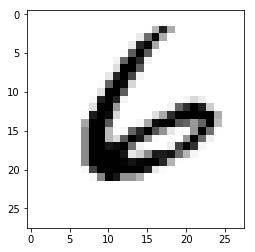

In [94]:
import matplotlib.pyplot as plt
import random

# parameters
training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
            
        print('Epoch:', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
        
    # Test the model using test sets
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    
    

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction:", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r+1]}))

    plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap="Greys", interpolation='nearest')
    plt.show()